In [9]:
import pandas as pd
import numpy as np
from sklearnex import patch_sklearn
patch_sklearn(verbose=False)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
import ourfunctions

In [2]:
X = pd.read_csv('data/Training-set-values.csv')
y = pd.read_csv('data/Training-set-labels.csv')

X['date_recorded'] = pd.to_datetime(X['date_recorded']).astype(np.int64)

### Models

In [3]:
knn = {'classifier': KNeighborsClassifier(n_jobs=3), 'preprocessor': None}
log_reg_basic = {'classifier': LogisticRegression(C=1e6, n_jobs=3), 'preprocessor': None}

models = {'log_reg_basic': log_reg_basic, 'knn': knn}

### Modeler

In [4]:
model_run = ourfunctions.Modeler(models, X=X, y=y)
log_reg_regularized = {'classifier': LogisticRegression(n_jobs=3), 'preprocessor': model_run.create_default_prep(num_add=[('scaling', StandardScaler())])}
model_run.add_model('log_reg_regularized', log_reg_regularized)

In [5]:
RandomFM_all_cols = {'classifier': RandomForestClassifier(max_depth=20, min_samples_split=4, n_jobs=3), 'preprocessor': None}
model_run.add_model('RandomFM-all', RandomFM_all_cols)

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
Train Accuracy :  0.733
Test Accuracy :  0.724
CV score (n=5) 0.7177
------------------------------------------------------------



/home/thedefect/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         precision    recall  f1-score   support

             functional       0.67      0.98      0.80      8093
functional needs repair       0.00      0.00      0.00      1086
         non functional       0.91      0.50      0.65      5671

               accuracy                           0.72     14850
              macro avg       0.53      0.49      0.48     14850
           weighted avg       0.72      0.72      0.68     14850

------------------------------------------------------------




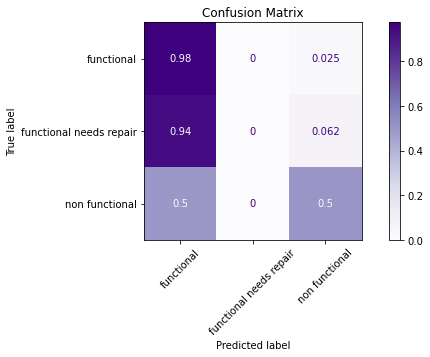

(<Figure size 720x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>)

In [6]:
model_run.model_evaluation('RandomFM-all')

In [7]:
X.keys()

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

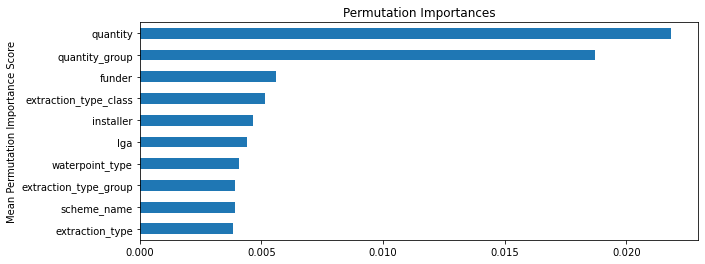

In [8]:
importance_kwargs = dict(n_repeats=10, n_jobs=3)
model_run.permutation_importance('RandomFM-all', perm_kwargs=importance_kwargs)